# Car Price Prediction

In this session we will be using the used car data set to explore the various features, do some feature enginering, tune some parameters, create a ML model and store it to use whenever required

The columns in the given dataset are as follows:

Car_Name - Name of the car

Year - Year of Purchase

Selling_Price - Selling Price of the used car

Present_Price - Selling Price of the new car

Kms_driven - Total kilometers driven

Fuel - Type of fuels required

Seller_Type -  Type of the Seller

Transmission - Type of transmission

Owner - Number of owners the car had

## Importing the libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt

## Read the data

In [2]:
df = pd.read_csv('../data/car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Basic Information

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [56]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [57]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Plot the Target variable

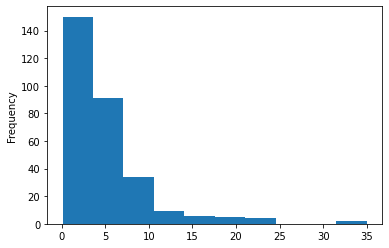

In [58]:
# ploting a histogram
df['Selling_Price'].plot(kind='hist')
plt.show()

## Plot the top 10 cars sold

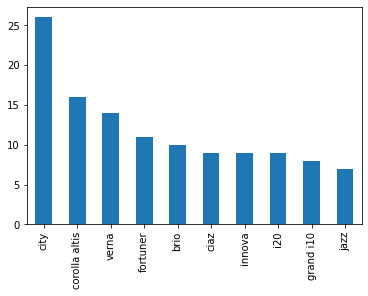

In [59]:
## Plotting top 10 cars according to number of sales
df['Car_Name'].value_counts()[:10].plot(kind = 'bar')
plt.show()

## Create a pair plot of the entire data

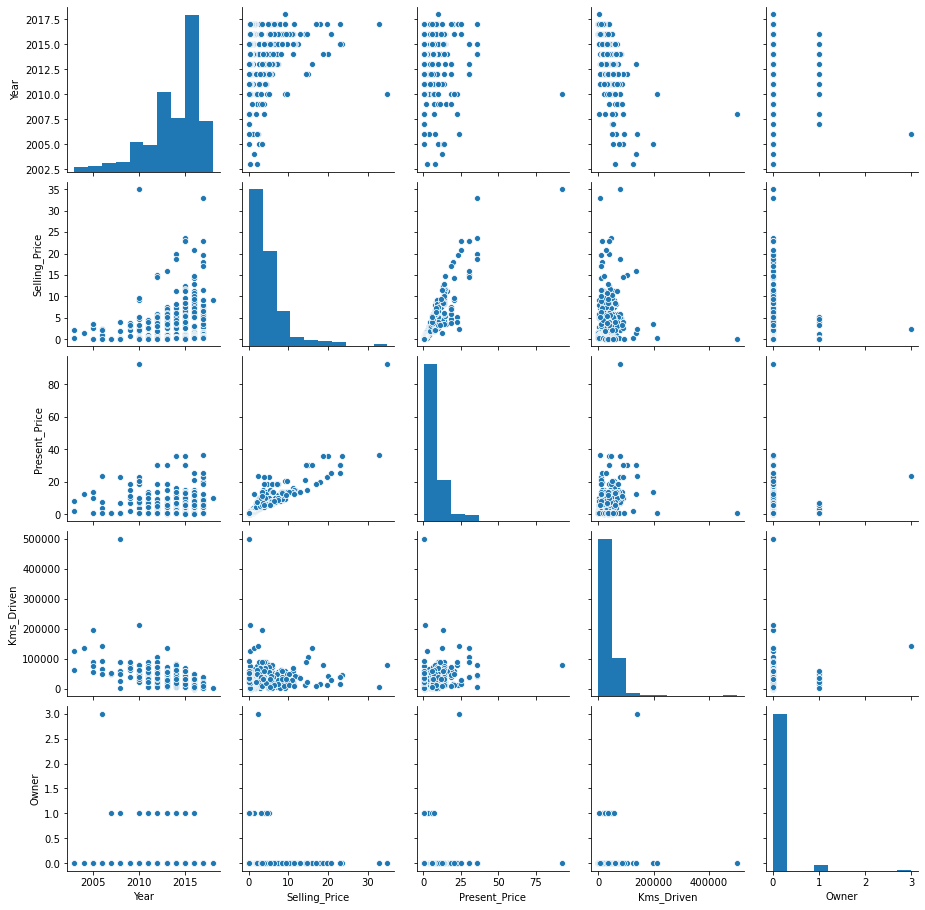

In [60]:
# Pair plot of the entire data
sns.pairplot(df)
plt.show()

* Present price and Selling price has a strong relationship

## Verify our observations finding the correlation with the data

In [61]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


## Create a pivot table to find the number of cars sold every year for the top 10 selling cars

In [62]:
# Creating a subset of the top 10 sold cars over the years
top_10 = df['Car_Name'].value_counts()[:10].index

# Creating a pivot table with
df[df['Car_Name'].isin(top_10)].pivot_table(index='Car_Name',columns='Year',values='Selling_Price',aggfunc='count')

Year,2005,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Car_Name,,,,,,,,,,,,
brio,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,4.0,2.0,1.0
ciaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,1.0,2.0
city,NaN,1.0,NaN,2.0,1.0,1.0,NaN,2.0,3.0,8.0,7.0,1.0
corolla altis,NaN,NaN,1.0,2.0,2.0,2.0,2.0,4.0,NaN,NaN,2.0,1.0
fortuner,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0,2.0,3.0,NaN,1.0
grand i10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,1.0,1.0
i20,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1.0,NaN,2.0,1.0
innova,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,3.0
jazz,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0


## Create a new feature which tells us how old the car is in terms of years

In [63]:
# Subtracting the year by current year
df['no_of_years'] = 2021 - df['Year']

In [64]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [65]:
df.drop(['Year'],1,inplace=True)

## Segregate the 'Car_Name' column into two parts keeping only the top 10 cars and the rest as others

In [66]:
# Creating a subset of the top 10 cars
cars = df['Car_Name'].value_counts()[:10].index.tolist()

In [67]:
# Modifying the car name column to use in our model
df['Car_Name'] = [x if x in cars else 'other' for x in df['Car_Name']]

## One Hot Encode the categorical columns

In [68]:
# One hot encoding the categorical columns
final_df = pd.get_dummies(df,columns = ['Car_Name','Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [69]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_jazz,Car_Name_other,Car_Name_verna,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,4.75,9.54,43000,0,8,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,4,1,0,0,0,0,0,0,0,0,0,0,1,0,1
3,2.85,4.15,5200,0,10,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,4.60,6.87,42450,0,7,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [70]:
final_df.shape

(301, 19)

In [71]:
final_df.rename(columns={'Car_Name_corolla altis':'Car_Name_corolla_altis','Car_Name_grand i10':'Car_Name_grand_i10'},inplace = True)

## Split the data into train and test parts

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Separating the data into Dependent and Independent features
X = final_df.drop('Selling_Price',1)
y = df['Selling_Price']

In [74]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

## Fit a base model using Linear regression

In [75]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,accuracy_score

In [76]:
# Initializing the Linear regression model
lr = LinearRegression()
# Fitting the data
lr.fit(X_train,y_train)
# Getting the predictions on the test data
y_pred = lr.predict(X_test)
# Finding the RMSE
rmse_lr = mean_squared_error(y_test,y_pred) ** 0.5

print(rmse_lr)

1.6958342135926976


## Fit a base Gradient boosting model

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train,y_train)

y_pred_gbr = gbr.predict(X_test)

rmse_gbr = mean_squared_error(y_test,y_pred_gbr) ** 0.5

print(rmse_gbr)

1.1137191415150356


## Do a Randomized Search CV on the GBR model, find out the best parameters and the results as well

In [78]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [79]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [80]:
# Initalizing the RandomSearchCV
gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid,
                                scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                                verbose=2, random_state=42, n_jobs = 1)

In [81]:
# Fitting the data
gbr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.8s finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
gbr_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [84]:
# Getting the predictions
predictions = gbr_random.predict(X_test)

rmse_gbr_2 = mean_squared_error(y_test,predictions) ** 0.5

print(rmse_gbr_2)

1.0175984092156425


## Package your model using pickle and store it

In [120]:
import pickle

In [121]:
# open a file, where you ant to store the data
file = open('gradient_boost_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(gbr_random, file)